In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as p

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# berinama kolom
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# membaca dataset
dataset = pd.read_csv(url, names=names)

In [3]:
#menambilkan sebagain dataset
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#membagi data yang akan digunakan untuk fase pelatihan dan pengujian

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
#penskalaan attribut

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



Text(0, 0.5, 'Rerata Eror')

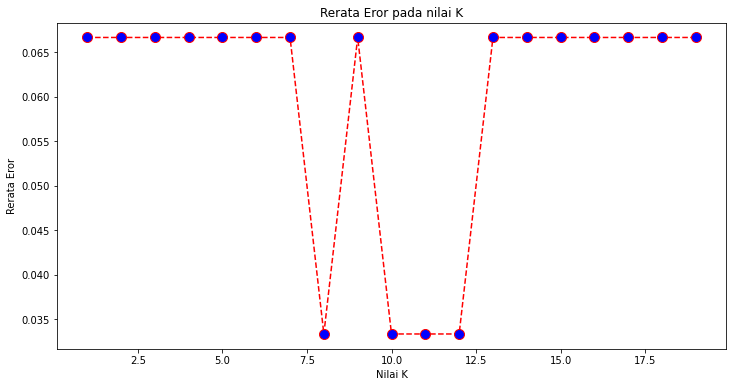

In [25]:
error = []

# Menghitung nilai eror untuk nilai dari 1 sampai 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rerata Eror pada nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rerata Eror')    